<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Ampere'sLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>DC vs AC</h1></b>

Dr. Bingsen Wang

11/26/2025
</center>

#Python Code

0
0
100
200
300
400
0


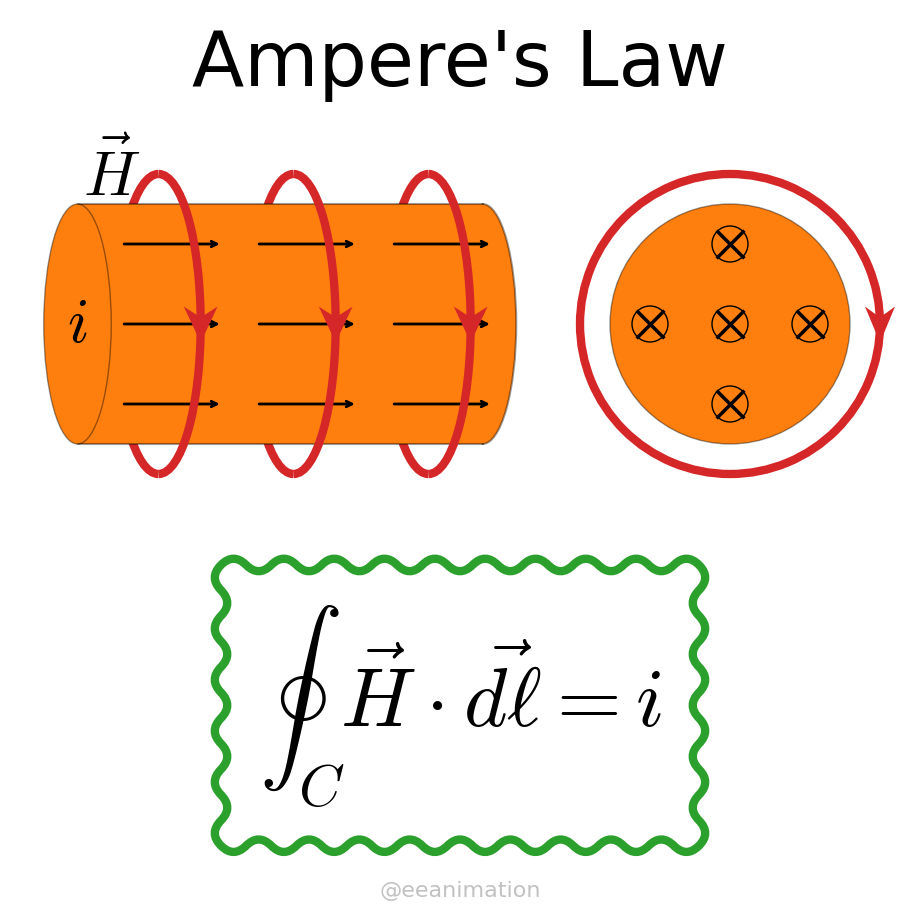

In [212]:
from matplotlib import pyplot,animation,cm,patches,markers
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nf=480; wt=np.linspace(0,2*np.pi,Nf)
it = np.cos(wt)
Npts=4; a = np.exp(1j*np.pi*2/Npts)
h=.4;w1=.1;w2=.6
hh = 1.25*h; ww=1.25*w1
hw = .05; #headwidth
hl = .06; #headlength
lw = 6; #linewidth
al = .15 #arrow length
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]); ax.axis('off')
ax1 = fig.add_axes([0,.45,.6,.4], xlim=[-.1,.7],ylim=[-.3,.3]); ax1.axis('off')
ax2 = fig.add_axes([.6,.45,.4,.4],xlim=[-.3,.3],ylim=[-.3,.3]); ax2.axis('off')
ax.text(0,1.1,"Ampere's Law",ha='center',va='center',size=55)
ax.text(0,-.7,r'$\oint_C\vec H\cdot\vec{d\ell}=i$', size=60,ha='center',multialignment='left',
        bbox=dict(boxstyle='roundtooth',pad=.6,fc='none',ec=cl[2],lw=6))
ax1.text(0,0,"$i$",ha='center',va='center',size=45)
ax1.text(.05,hh/2,r"$\vec H$",ha='center',va='center',size=45)
hlines = [patches.Arc(((k+.6)*w2/3,0),height=hh,width=ww,theta1=-90,theta2=90,fc='none',zorder=3)for k in range(3)]
hlines += [patches.Arc(((k+.6)*w2/3,0),height=hh,width=ww,theta1=90,theta2=-90,fc='none',zorder=-3)for k in range(3)]
hlines += [patches.Arc((0,0),height=hh,width=hh,fc='none')]
harrows = [patches.FancyArrow((k+.6)*w2/3+ww/2,hl/2,dx=0,dy=-.001,head_width=hw,head_length=hl,overhang=.3,width=0,lw=0,zorder=3)for k in range(3)]
harrows += [patches.FancyArrow(hh/2,hl/2,dx=0,dy=-.001,head_width=hw,head_length=hl,overhang=.3,width=0,lw=0,zorder=3)]

[ax1.add_patch(patches.Ellipse(([0,w2][k],0),height=h,width=w1,fc=cl[1],ec='none',alpha=1))for k in range(2)]
ax1.add_patch(patches.Rectangle((0,-h/2),height=h,width=w2,fc=cl[1],ec='none',alpha=1))
ax1.add_patch(patches.Ellipse((0,0),height=h,width=w1,fc='none',ec='k',alpha=.4))
ax1.add_patch(patches.Arc((w2,0),height=h,width=w1,theta1=-90,theta2=90,fc='none',ec='k',alpha=.4,lw=1.5,capstyle='round'))

[ax1.plot([0,w2],[h*(.5-k)]*2,lw=1.5,c='k',alpha=.4,solid_capstyle='round')for k in range(2)]
arrows=[ax1.annotate('',xy=(0,0),xytext=(0,0), arrowprops=dict(arrowstyle='->',color='k',lw=2)) for k in range(3) for m in range(3)]

ax2.add_patch(patches.Ellipse((0,0),height=h,width=h,fc=cl[1],ec='none',alpha=1))
ax2.add_patch(patches.Ellipse((0,0),height=h,width=h,ec='k',fc='none',alpha=.4))
ax2.add_patch(patches.Ellipse((0,0),height=hl,width=hl,ec='k',fc='none',alpha=1))
[ax2.add_patch(patches.Ellipse((h/3*(a**k).real,h/3*(a**k).imag),height=.06,width=.06,ec='k',fc='none',alpha=1))for k in range(Npts)]
[ax1.add_patch(hlines[k]) for k in range(len(hlines)-1)]
[ax1.add_patch(harrows[k]) for k in range(len(harrows)-1)]
ax2.add_patch(hlines[-1])
ax2.add_patch(harrows[-1])
dots=[ax2.scatter(0,0,color='k',lw=2.5)]
dots+=[ax2.scatter(h/3*(a**k).real,h/3*(a**k).imag,color='k',lw=2.5) for k in range(Npts)]

def animate(i):
  # i=320
  if i%100==0: print(i)
  itp = int(np.heaviside(it[i],0))
  [arrows[k].set_position((-al/2*it[i]+(k//3+.7)*w2/3,h*(k%3-1)/3)) for k in range(len(arrows))]
  for k in range(len(arrows)):
   arrows[k].xy=((al/2*it[i]+(k//3+.7)*w2/3,h*(k%3-1)/3))
  [hlines[k].set_linewidth(lw*np.abs(it[i])) for k in range(len(hlines))]
  [hlines[k].set_edgecolor([cl[0],cl[3]][itp]) for k in range(len(hlines))]
  [harrows[k].set_data(y=hl/2*(itp*2-1),dy=.001*(1-2*itp),head_width=hw*np.abs(it[i])) for k in range(len(harrows))]
  [harrows[k].set_color([cl[0],cl[3]][itp]) for k in range(len(harrows))]
  for k in range(len(dots)):
    new_marker_style = markers.MarkerStyle(['o','x'][itp]) # 's' for square
    dots[k].set_paths((new_marker_style.get_path(),))
    dots[k].set_sizes([(10*it[i])**2])
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=16,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("AmpersLaw.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)